In [24]:
import pandas as pd


In [25]:
df = pd.read_csv("/content/database_24_25.csv")
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14492 entries, 0 to 14491
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  14492 non-null  object 
 1   Tm      14492 non-null  object 
 2   Opp     14492 non-null  object 
 3   Res     14492 non-null  object 
 4   MP      14492 non-null  float64
 5   FG      14492 non-null  int64  
 6   FGA     14492 non-null  int64  
 7   FG%     14492 non-null  float64
 8   3P      14492 non-null  int64  
 9   3PA     14492 non-null  int64  
 10  3P%     14492 non-null  float64
 11  FT      14492 non-null  int64  
 12  FTA     14492 non-null  int64  
 13  FT%     14492 non-null  float64
 14  ORB     14492 non-null  int64  
 15  DRB     14492 non-null  int64  
 16  TRB     14492 non-null  int64  
 17  AST     14492 non-null  int64  
 18  STL     14492 non-null  int64  
 19  BLK     14492 non-null  int64  
 20  TOV     14492 non-null  int64  
 21  PF      14492 non-null  int64  
 22

In [ ]:
hawks_df = df[df["Tm"] == "ATL"]
hawks_summary = hawks_df.describe()
hawks_summary

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.00000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,24.603710,4.316742,9.386878,0.442079,1.307692,3.764706,0.264781,1.89819,2.443439,0.467577,1.248869,3.373303,4.622172,2.986425,1.063348,0.531674,1.558824,1.880090,11.839367,9.878507
std,9.718646,2.938391,5.497648,0.229290,1.493868,3.059326,0.271973,2.40861,2.850423,0.431795,1.669130,2.795122,3.770004,3.560911,1.338617,0.819347,1.712281,1.422722,8.180447,7.849518
min,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.200000
25%,19.240000,2.000000,5.000000,0.333000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,3.900000
50%,25.175000,4.000000,9.000000,0.444000,1.000000,4.000000,0.250000,1.00000,2.000000,0.500000,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000,11.000000,9.150000
75%,31.747500,6.000000,13.000000,0.571000,2.000000,6.000000,0.500000,3.00000,4.000000,1.000000,2.000000,5.000000,7.000000,4.000000,2.000000,1.000000,2.000000,3.000000,17.000000,15.000000
max,42.300000,13.000000,31.000000,1.000000,7.000000,14.000000,1.000000,14.00000,17.000000,1.000000,10.000000,12.000000,21.000000,22.000000,8.000000,4.000000,11.000000,6.000000,43.000000,32.000000


In [ ]:
hawks_df["Data"] = pd.to_datetime(hawks_df["Data"])
hawks_df = hawks_df.sort_values(by=["Player", "Data"])

# Rolling averages (last 5 games)
hawks_df["PTS_rolling_5"] = hawks_df.groupby("Player")["PTS"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
hawks_df["FGA_rolling_5"] = hawks_df.groupby("Player")["FGA"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
hawks_df["FG%_rolling_5"] = hawks_df.groupby("Player")["FG%"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
hawks_df["3PA_rolling_5"] = hawks_df.groupby("Player")["3PA"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
hawks_df["3P%_rolling_5"] = hawks_df.groupby("Player")["3P%"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

# Historical performance vs. each opponent
hawks_df["PTS_vs_Opp"] = hawks_df.groupby(["Player", "Opp"])["PTS"].transform("mean")

features = ["MP", "FGA_rolling_5", "FG%_rolling_5", "3PA_rolling_5", "3P%_rolling_5", "PTS_vs_Opp"]
target = "PTS"

hawks_df = hawks_df.dropna(subset=features)

<ipython-input-5-0ca145ce635f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawks_df["Data"] = pd.to_datetime(hawks_df["Data"])


In [ ]:
hawks_df

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,PF,PTS,GmSc,Data,PTS_rolling_5,FGA_rolling_5,FG%_rolling_5,3PA_rolling_5,3P%_rolling_5,PTS_vs_Opp
182,Bogdan Bogdanović,ATL,BRK,W,27.83,2,6,0.333,2,6,...,3,8,4.8,2024-10-23,8.000000,6.0,0.33300,6.000000,0.333000,8.0
4557,Bogdan Bogdanović,ATL,SAC,W,18.40,2,7,0.286,2,6,...,1,6,4.5,2024-11-18,7.000000,6.5,0.30950,6.000000,0.333000,6.0
4930,Bogdan Bogdanović,ATL,GSW,L,23.30,2,14,0.143,1,7,...,3,6,-4.4,2024-11-20,6.666667,9.0,0.25400,6.333333,0.269667,6.0
5052,Bogdan Bogdanović,ATL,CHI,L,26.17,6,11,0.545,4,8,...,2,16,13.0,2024-11-22,9.000000,9.5,0.32675,6.750000,0.327250,9.5
5530,Bogdan Bogdanović,ATL,DAL,L,27.77,8,15,0.533,2,6,...,4,18,9.7,2024-11-25,10.800000,10.6,0.36800,6.600000,0.328400,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913,Zaccharie Risacher,ATL,LAL,L,25.27,3,8,0.375,0,2,...,3,7,2.3,2025-01-03,11.800000,10.4,0.45000,4.400000,0.302600,9.0
11031,Zaccharie Risacher,ATL,LAC,L,28.18,5,11,0.455,1,4,...,2,13,9.5,2025-01-04,11.200000,10.2,0.45760,3.800000,0.266800,13.0
11515,Zaccharie Risacher,ATL,UTA,W,23.88,6,14,0.429,2,4,...,2,14,8.8,2025-01-07,12.200000,10.6,0.47680,3.800000,0.316800,14.0
11892,Zaccharie Risacher,ATL,PHO,L,19.35,2,4,0.500,0,0,...,1,5,3.6,2025-01-09,10.400000,9.8,0.45180,3.200000,0.183400,3.5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

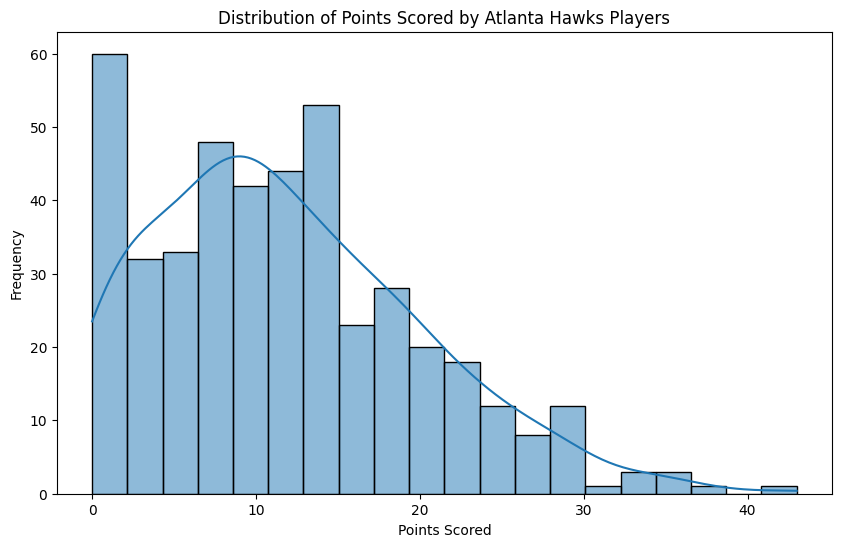

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(hawks_df["PTS"], bins=20, kde=True)
plt.title("Distribution of Points Scored by Atlanta Hawks Players")
plt.xlabel("Points Scored")
plt.ylabel("Frequency")
plt.show()

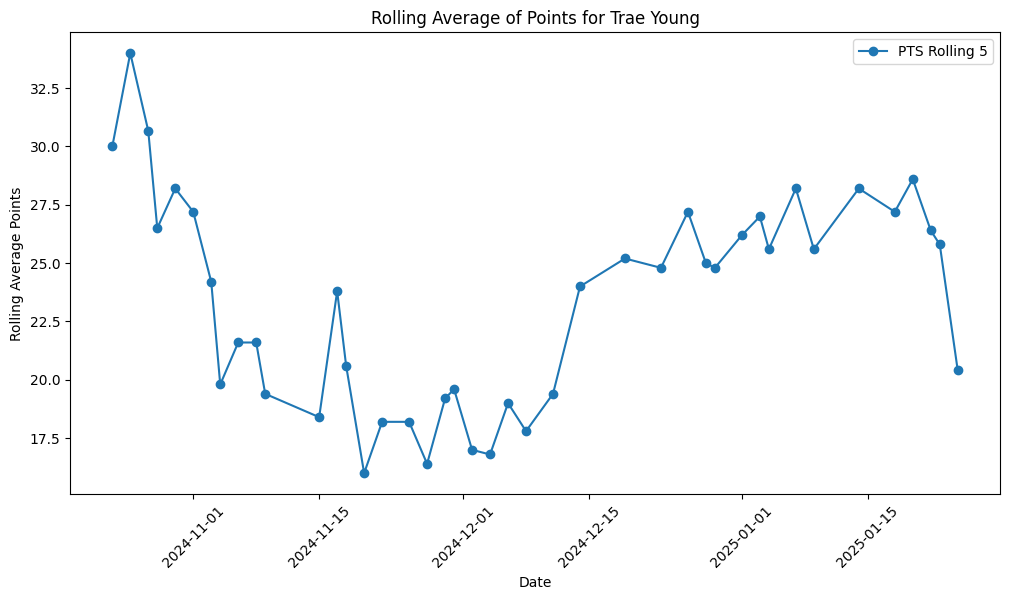

In [ ]:
player_name = "Trae Young"
player_df = hawks_df[hawks_df["Player"] == player_name]
plt.figure(figsize=(12, 6))
plt.plot(player_df["Data"], player_df["PTS_rolling_5"], marker="o", label="PTS Rolling 5")
plt.xlabel("Date")
plt.ylabel("Rolling Average Points")
plt.title(f"Rolling Average of Points for {player_name}")
plt.legend()
plt.xticks(rotation=45)
plt.show()

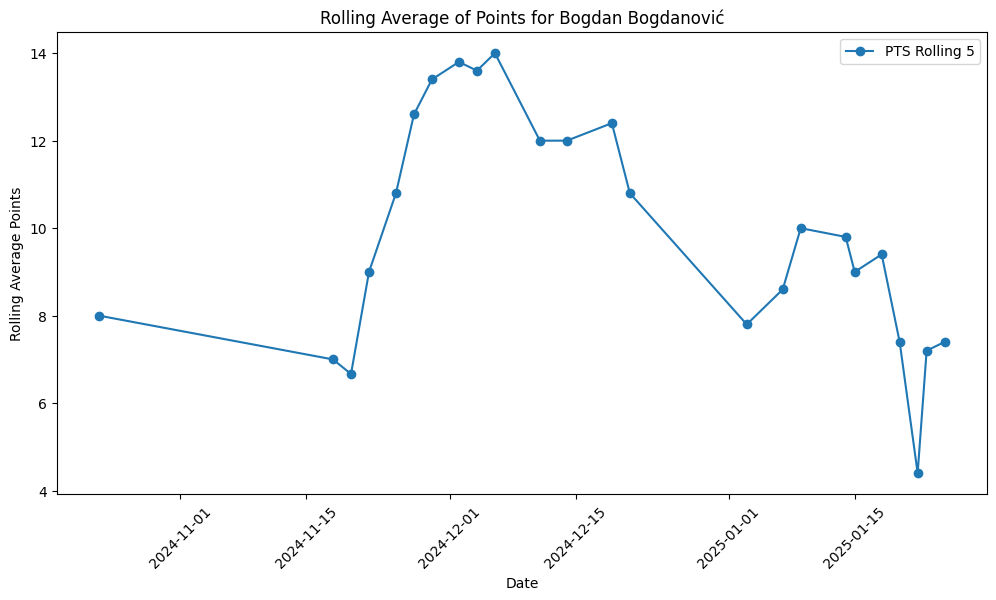

In [ ]:
player_name = "Bogdan Bogdanović"
player_df = hawks_df[hawks_df["Player"] == player_name]
plt.figure(figsize=(12, 6))
plt.plot(player_df["Data"], player_df["PTS_rolling_5"], marker="o", label="PTS Rolling 5")
plt.xlabel("Date")
plt.ylabel("Rolling Average Points")
plt.title(f"Rolling Average of Points for {player_name}")
plt.legend()
plt.xticks(rotation=45)
plt.show()

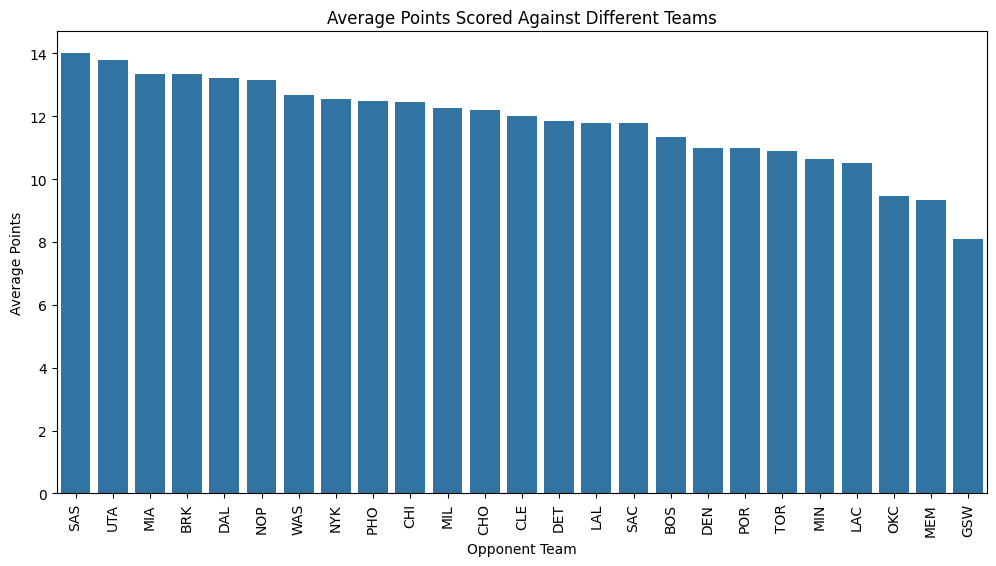

In [ ]:
plt.figure(figsize=(12, 6))
avg_pts_vs_teams = hawks_df.groupby("Opp")["PTS"].mean().sort_values(ascending=False)
sns.barplot(x=avg_pts_vs_teams.index, y=avg_pts_vs_teams.values)
plt.title("Average Points Scored Against Different Teams")
plt.xlabel("Opponent Team")
plt.ylabel("Average Points")
plt.xticks(rotation=90)
plt.show()

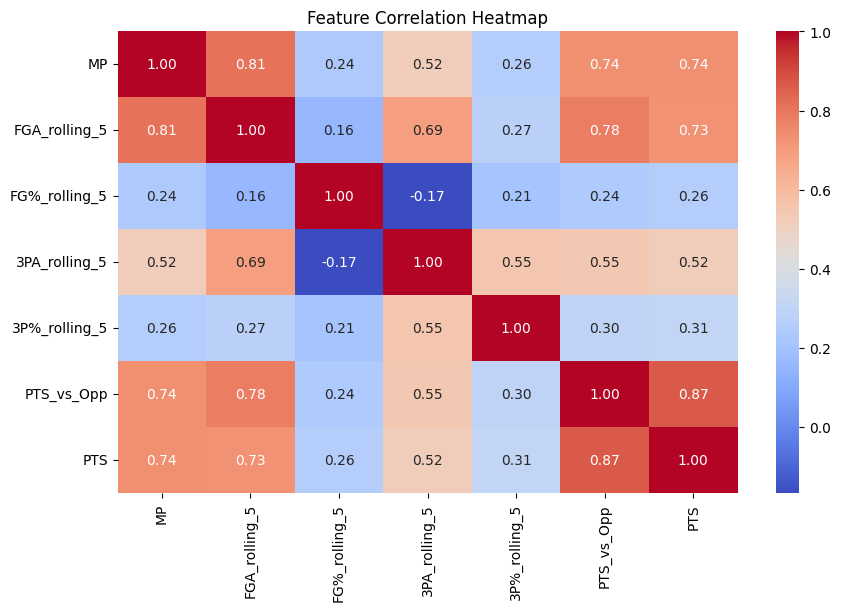

In [ ]:
plt.figure(figsize=(10, 6))
corr = hawks_df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
top_scorers_total = hawks_df.groupby("Player")["PTS"].sum().sort_values(ascending=False).head(10)
top_scorers_avg = hawks_df.groupby("Player")["PTS"].mean().sort_values(ascending=False).head(10)

print("Top Scorers (Total Points):\n", top_scorers_total)
print("\nTop Scorers (Average Per Game):\n", top_scorers_avg)

Top Scorers (Total Points):
 Player
Trae Young            956
Jalen Johnson         680
De'Andre Hunter       580
Dyson Daniels         555
Onyeka Okongwu        451
Clint Capela          414
Zaccharie Risacher    410
Garrison Mathews      290
Bogdan Bogdanović     240
Vit Krejci            191
Name: PTS, dtype: int64

Top Scorers (Average Per Game):
 Player
Trae Young            22.761905
Jalen Johnson         18.888889
De'Andre Hunter       18.709677
Dyson Daniels         13.536585
Daeqwon Plowden       12.000000
Onyeka Okongwu        11.868421
Zaccharie Risacher    10.512821
Bogdan Bogdanović     10.000000
Larry Nance            9.533333
Clint Capela           9.409091
Name: PTS, dtype: float64


In [ ]:
best_fg_percent = hawks_df.groupby("Player")["FG%"].mean().sort_values(ascending=False).head(10)
best_3p_percent = hawks_df.groupby("Player")["3P%"].mean().sort_values(ascending=False).head(10)

print("\nBest FG% Shooters:\n", best_fg_percent)
print("\nBest 3P% Shooters:\n", best_3p_percent)


Best FG% Shooters:
 Player
Daeqwon Plowden    0.687500
Clint Capela       0.582864
Larry Nance        0.544467
Onyeka Okongwu     0.543579
Jalen Johnson      0.498222
Dyson Daniels      0.477073
De'Andre Hunter    0.455129
David Roddy        0.428960
Kobe Bufkin        0.416000
Trae Young         0.394905
Name: FG%, dtype: float64

Best 3P% Shooters:
 Player
Daeqwon Plowden      0.666500
Larry Nance          0.425733
De'Andre Hunter      0.406774
Garrison Mathews     0.340944
Trae Young           0.330905
Dyson Daniels        0.320537
Bogdan Bogdanović    0.310500
David Roddy          0.303320
Jalen Johnson        0.291694
Vit Krejci           0.274400
Name: 3P%, dtype: float64


In [ ]:
close_games = hawks_df[hawks_df["Res"].str.contains("W|L") & (hawks_df["PTS"] >= 20)]
clutch_performers = close_games.groupby("Player")["PTS"].mean().sort_values(ascending=False).head(10)

print("\nTop Clutch Performers (Avg Points in Close Games):\n", clutch_performers)


Top Clutch Performers (Avg Points in Close Games):
 Player
Zaccharie Risacher    33.000000
Trae Young            27.962963
Keaton Wallace        27.000000
Onyeka Okongwu        25.000000
Garrison Mathews      24.000000
Jalen Johnson         23.666667
Dyson Daniels         23.600000
De'Andre Hunter       23.470588
Bogdan Bogdanović     21.500000
Larry Nance           21.000000
Name: PTS, dtype: float64


In [ ]:
best_vs_opponents = hawks_df.groupby(["Player", "Opp"])["PTS"].mean().reset_index()
best_vs_opponents = best_vs_opponents.sort_values(by="PTS", ascending=False).head(10)

print("\nBest Individual Performances vs. Opponents:\n", best_vs_opponents)


Best Individual Performances vs. Opponents:
               Player  Opp   PTS
225       Trae Young  LAL  32.0
232       Trae Young  PHO  32.0
216       Trae Young  BRK  30.0
233       Trae Young  POR  29.0
228       Trae Young  MIN  29.0
195   Onyeka Okongwu  BRK  28.0
141    Jalen Johnson  DAL  28.0
146    Jalen Johnson  MIA  28.0
80   De'Andre Hunter  SAS  27.0
73   De'Andre Hunter  MIA  26.0


In [ ]:
hawks_df["Home"] = hawks_df["Res"].apply(lambda x: "Home" if "@" not in x else "Away")
home_vs_away = hawks_df.groupby("Home")["PTS"].mean()

print("\nHome vs. Away Performance:\n", home_vs_away)


Home vs. Away Performance:
 Home
Home    11.839367
Name: PTS, dtype: float64


In [ ]:
player_variance = hawks_df.groupby("Player")["PTS"].std().dropna()
most_consistent = player_variance.nsmallest(10)
most_unpredictable = player_variance.nlargest(10)

print("\nMost Consistent Scorers (Lowest Variance):\n", most_consistent)
print("\nMost Unpredictable Scorers (Highest Variance):\n", most_unpredictable)


Most Consistent Scorers (Lowest Variance):
 Player
Mouhamed Gueye        1.414214
Kobe Bufkin           3.093003
Dominick Barlow       3.535534
David Roddy           4.778424
Clint Capela          4.957110
Dyson Daniels         5.385618
Vit Krejci            5.436044
Onyeka Okongwu        5.609697
Zaccharie Risacher    5.924400
Bogdan Bogdanović     5.956363
Name: PTS, dtype: float64

Most Unpredictable Scorers (Highest Variance):
 Player
Daeqwon Plowden       9.899495
Trae Young            8.908230
Larry Nance           6.854265
Keaton Wallace        6.623821
De'Andre Hunter       6.367593
Garrison Mathews      6.355850
Jalen Johnson         6.204965
Bogdan Bogdanović     5.956363
Zaccharie Risacher    5.924400
Onyeka Okongwu        5.609697
Name: PTS, dtype: float64


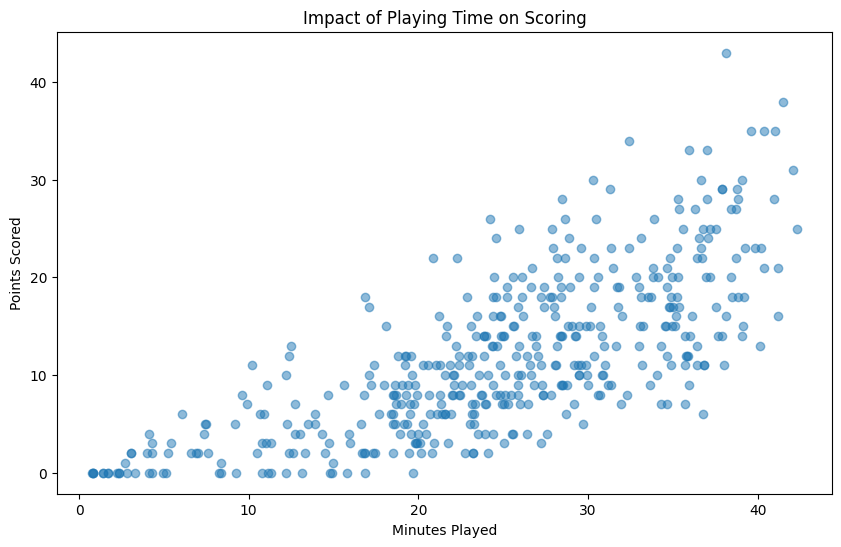

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(hawks_df["MP"], hawks_df["PTS"], alpha=0.5)
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")
plt.title("Impact of Playing Time on Scoring")
plt.show()

In [ ]:
hawks_df["Game_Number"] = hawks_df.groupby("Player").cumcount() + 1

first_10 = hawks_df[hawks_df["Game_Number"] <= 10].groupby("Player")["PTS"].mean()
last_10 = hawks_df[hawks_df["Game_Number"] > (hawks_df["Game_Number"].max() - 10)].groupby("Player")["PTS"].mean()

improvement = (last_10 - first_10).dropna().sort_values(ascending=False).head(10)
print("\nMost Improved Players (Last 10 Games vs. First 10 Games):\n", improvement)


Most Improved Players (Last 10 Games vs. First 10 Games):
 Player
Onyeka Okongwu        3.950000
Dyson Daniels         2.128571
Clint Capela         -0.400000
Trae Young           -1.150000
Zaccharie Risacher   -3.300000
Jalen Johnson        -9.000000
Garrison Mathews     -9.600000
Name: PTS, dtype: float64
